In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


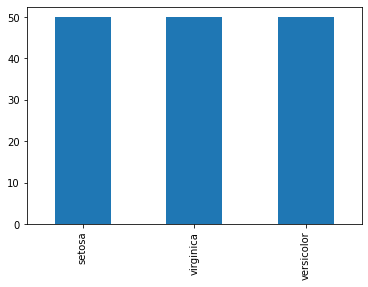

In [8]:
#the data set is normally distributed
data.species.value_counts().plot.bar()

In [9]:
#dataset is balanced

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
features = data.drop('species', axis=1)
label = data.species

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=5)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [17]:
y_test_pred = gnb.predict(x_test)
y_train_pred = gnb.predict(x_train)

In [18]:

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train_pred, y_train)
print("Accuracy for train model is ", train_accuracy)

test_accuracy = accuracy_score(y_test_pred, y_test)
print("Accuracy for test model is ", test_accuracy)

Accuracy for train model is  0.975
Accuracy for test model is  0.9


In [19]:
#Accuracy is not 98%, trying with different random state

In [23]:
for i in range(1,20):
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=i)
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_test_pred = gnb.predict(x_test)
    y_train_pred = gnb.predict(x_train)
    train_accuracy = accuracy_score(y_train_pred, y_train)
    
    test_accuracy = accuracy_score(y_test_pred, y_test)
   
    if test_accuracy >= 0.98:
        print("Accuracy for train model is and random_state is", train_accuracy, i)
        print("Accuracy for test model is ", test_accuracy)

Accuracy for train model is and random_state is 0.9583333333333334 9
Accuracy for test model is  1.0
Accuracy for train model is and random_state is 0.95 10
Accuracy for test model is  1.0
Accuracy for train model is and random_state is 0.9583333333333334 15
Accuracy for test model is  1.0
Accuracy for train model is and random_state is 0.9416666666666667 18
Accuracy for test model is  1.0


In [26]:
# going with random_state =9
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=9)
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_test_pred = gnb.predict(x_test)
y_train_pred = gnb.predict(x_train)
train_accuracy = accuracy_score(y_train_pred, y_train)
    
test_accuracy = accuracy_score(y_test_pred, y_test)
   
if test_accuracy >= 0.98:
    print("Accuracy for train model is and random_state is", train_accuracy, 9)
    print("Accuracy for test model is ", test_accuracy)

Accuracy for train model is and random_state is 0.9583333333333334 9
Accuracy for test model is  1.0


In [27]:
gnb.score(x_train,y_train)

0.9583333333333334

In [28]:
gnb.score(x_test, y_test)

1.0

In [29]:
import pickle
pickle
pickle.dump(gnb, open('IrisPredictor.kritika','wb'))